In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

## TATA CONSULTANCY SERVICES LIMITED Equities details over the last 2 years (07 Apr 2020 - 01 Apr 2022)

In [2]:
df = pd.read_csv("Quote-Equity-TCS-EQ-04-04-2020-to-04-04-2022.csv",index_col="Date",parse_dates=True)
df.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2022-04-01,EQ,"3,748.00","3,763.00","3,728.05","3,739.95","3,759.00","3,758.75","3,747.37","4,043.00","3,004.00",1387014,"5,19,76,52,138.25",91136
2022-03-31,EQ,"3,740.00","3,754.65","3,720.20","3,731.55","3,742.85","3,739.95","3,743.43","4,043.00","3,004.00",2168110,"8,11,61,63,209.35",146788
2022-03-30,EQ,"3,738.00","3,738.00","3,706.20","3,705.35","3,730.00","3,731.55","3,723.34","4,043.00","3,004.00",1583455,"5,89,57,44,278.15",109724
2022-03-29,EQ,"3,694.75","3,722.00","3,691.00","3,707.70","3,701.00","3,705.35","3,707.08","4,043.00","3,004.00",2689063,"9,96,85,77,738.75",166424
2022-03-28,EQ,"3,695.00","3,713.00","3,661.20","3,707.45","3,700.00","3,707.70","3,689.86","4,043.00","3,004.00",1760990,"6,49,78,04,966.20",119630


### Considering the "close" price feature for analysis

In [3]:
data = pd.DataFrame(df["close"])
data.head()

,close
Date,
2022-04-01,"3,758.75"
2022-03-31,"3,739.95"
2022-03-30,"3,731.55"
2022-03-29,"3,705.35"
2022-03-28,"3,707.70"


### Arranging dates in chronological order

In [4]:
data.sort_index(inplace=True)
data.head(10)

,close
Date,
2020-04-07,"1,775.20"
2020-04-08,"1,705.45"
2020-04-09,"1,766.15"
2020-04-13,"1,759.25"
2020-04-15,"1,735.15"
2020-04-16,"1,716.05"
2020-04-17,"1,806.20"
2020-04-20,"1,818.65"
2020-04-21,"1,737.65"


In [5]:
data.tail(10)

,close
Date,
2022-03-21,"3,626.70"
2022-03-22,"3,700.95"
2022-03-23,"3,712.40"
2022-03-24,"3,749.85"
2022-03-25,"3,707.45"
2022-03-28,"3,707.70"
2022-03-29,"3,705.35"
2022-03-30,"3,731.55"
2022-03-31,"3,739.95"


We can see that there are missing dates ie weekends and holidays. Hence, adding the missing dates and filling the "close" feature with close price of the previous day.

In [6]:
data = data.resample("D").ffill()
data.head(10)

,close
Date,
2020-04-07,"1,775.20"
2020-04-08,"1,705.45"
2020-04-09,"1,766.15"
2020-04-10,"1,766.15"
2020-04-11,"1,766.15"
2020-04-12,"1,766.15"
2020-04-13,"1,759.25"
2020-04-14,"1,759.25"
2020-04-15,"1,735.15"


In [7]:
data.tail(10)

,close
Date,
2022-03-23,"3,712.40"
2022-03-24,"3,749.85"
2022-03-25,"3,707.45"
2022-03-26,"3,707.45"
2022-03-27,"3,707.45"
2022-03-28,"3,707.70"
2022-03-29,"3,705.35"
2022-03-30,"3,731.55"
2022-03-31,"3,739.95"


### Converting "close" feature to float datatype

In [8]:
for i in range(len(data)):
    data["close"][i] = data["close"][i].replace(",","")
data.head()

,close
Date,
2020-04-07,1775.20
2020-04-08,1705.45
2020-04-09,1766.15
2020-04-10,1766.15
2020-04-11,1766.15


In [9]:
data["close"] = data["close"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 725 entries, 2020-04-07 to 2022-04-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   725 non-null    float64
dtypes: float64(1)
memory usage: 11.3 KB


In [10]:
print("Total number of records:",data.shape[0])

Total number of records: 725


### Plotting the close price over the last 2 years

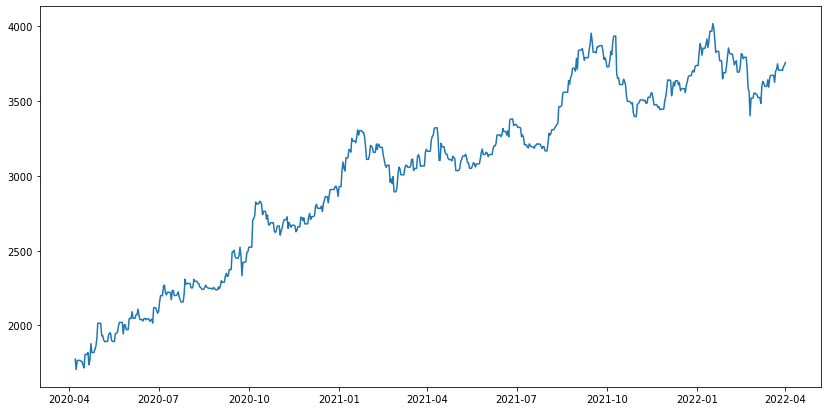

In [11]:
rcParams["figure.figsize"] = 14,7
plt.plot(data)

We can see that there is no seasonality. 

### Applying seasonal decompose to check the Trend, Seasonality and Residuals

In [12]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive model

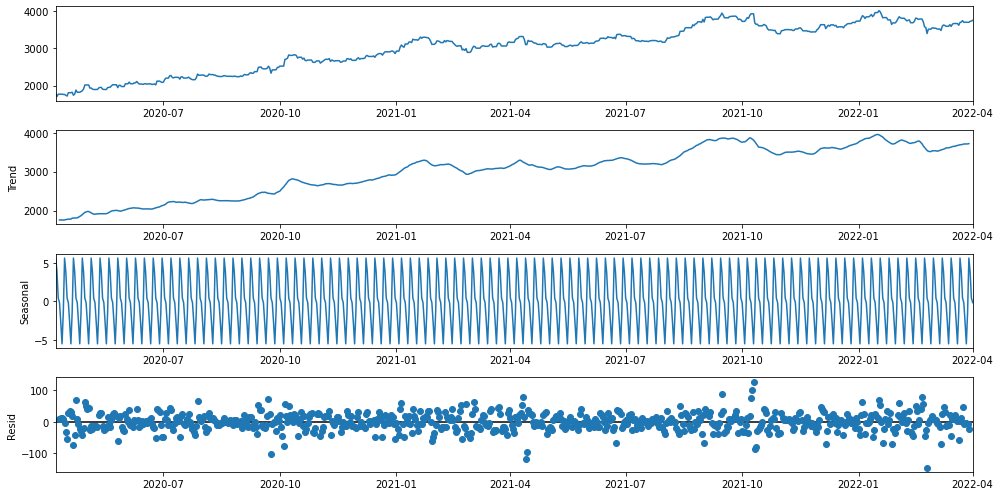

In [14]:
decomp_add = seasonal_decompose(data, model="additive")
decomp_add.plot();

### Mulitplicative

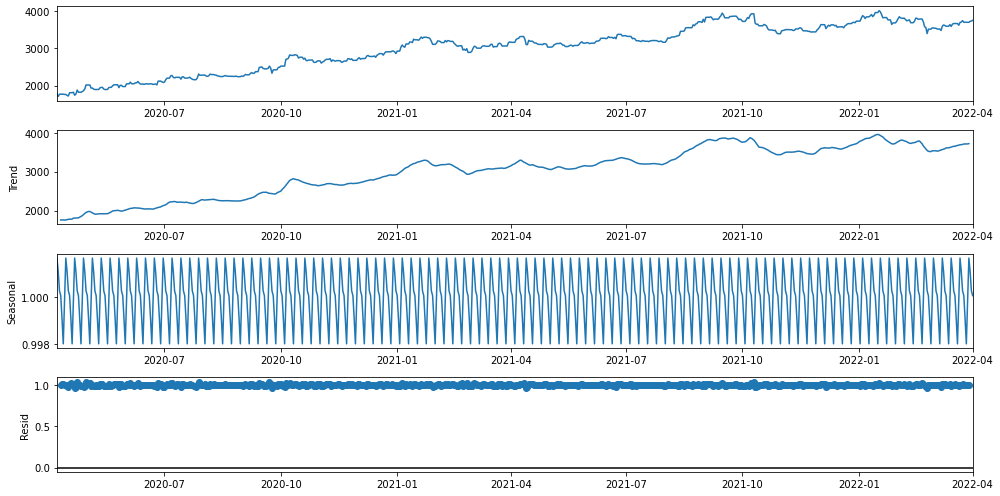

In [15]:
decomp_mul = seasonal_decompose(data, model="muliplicative")
decomp_mul.plot();

### Splitting data for training and testing Smoothing predictions

In [16]:
len(data[data.index < '2021-12'])

603

In [17]:
len(data[data.index >= '2021-12'])

122

In [18]:
train = data[data.index <= "2021-12"]
test = data[data.index > "2021-12"]

In [19]:
display(train)

,close
Date,
2020-04-07,1775.20
2020-04-08,1705.45
2020-04-09,1766.15
2020-04-10,1766.15
2020-04-11,1766.15
...,...
2021-11-27,3446.85
2021-11-28,3446.85
2021-11-29,3502.00


In [20]:
display(test)

,close
Date,
2021-12-02,3642.90
2021-12-03,3640.45
2021-12-04,3640.45
2021-12-05,3640.45
2021-12-06,3536.40
...,...
2022-03-28,3707.70
2022-03-29,3705.35
2022-03-30,3731.55


In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Simple Exponential Smoothing model

In [22]:
model_SES = SimpleExpSmoothing(train, initialization_method='estimated')

In [23]:
model_SES_autofit = model_SES.fit(optimized=True)

In [24]:
model_SES_autofit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1775.2015497879877,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [25]:
SES_predict= model_SES_autofit.forecast(steps = len(test))

In [26]:
SES_predict

2021-12-02    3577.799999
2021-12-03    3577.799999
2021-12-04    3577.799999
2021-12-05    3577.799999
2021-12-06    3577.799999
                 ...     
2022-03-28    3577.799999
2022-03-29    3577.799999
2022-03-30    3577.799999
2022-03-31    3577.799999
2022-04-01    3577.799999
Freq: D, Length: 121, dtype: float64

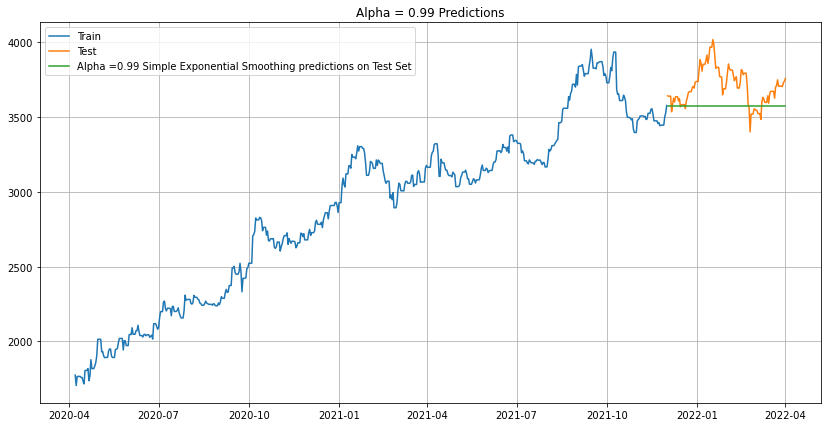

In [27]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
print('SES MSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES MSE: 175.1964599108387


In [30]:
import statsmodels.tools.eval_measures as em

In [31]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [32]:
print('SES RMSE (calculated using statsmodels):',em.mse(test.values,SES_predict.values)[0])
print('SES MAPE :',MAPE(test.values,SES_predict.values))

SES RMSE (calculated using statsmodels): 30693.799565290126
SES MAPE : 3.721733075904601


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",175.19646


### Double Exponential Smoothing model

In [34]:
model_DES = Holt(train,initialization_method='estimated')

In [35]:
model_DES = model_DES.fit()

In [36]:
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.995, 'smoothing_trend': 0.02369047619047619, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1764.1499999999992, 'initial_trend': -2.3009090909089878, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [37]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

2021-12-02    3578.280383
2021-12-03    3579.006898
2021-12-04    3579.733414
2021-12-05    3580.459929
2021-12-06    3581.186445
                 ...     
2022-03-28    3662.556187
2022-03-29    3663.282703
2022-03-30    3664.009218
2022-03-31    3664.735734
2022-04-01    3665.462249
Freq: D, Length: 121, dtype: float64

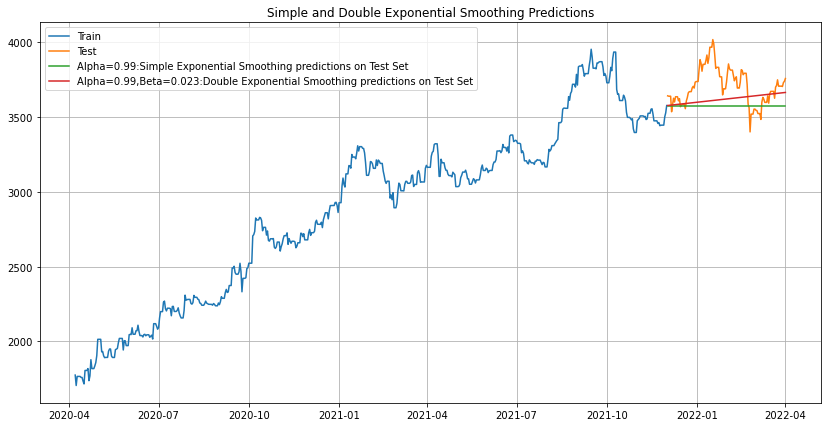

In [38]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.023:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [39]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))
print('DES MAPE :',MAPE(test.values,DES_predict.values))

DES RMSE: 150.57533830811462
DES MAPE : 3.0924955607545366


In [40]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.99,Beta=0.023:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",175.196460
"Alpha=0.99,Beta=0.023:DES",150.575338


### Triple Exponential Smoothing model

In [41]:
model_TES = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

In [42]:
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.8889290402989499, 'smoothing_trend': 0.00010390604113660438, 'smoothing_seasonal': 0.11107048606070583, 'damping_trend': nan, 'initial_level': 1748.8830106130904, 'initial_trend': 1.0016858026769024, 'initial_seasons': array([1.01381668, 1.00177937, 1.00922571, 1.01099715, 1.01303951,
       1.01570654, 1.02018475]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [43]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

2021-12-02    3579.088837
2021-12-03    3597.575579
2021-12-04    3606.443106
2021-12-05    3608.692410
2021-12-06    3614.503888
                 ...     
2022-03-28    4351.630696
2022-03-29    4354.441516
2022-03-30    4350.709369
2022-03-31    4359.267523
2022-04-01    4381.784051
Freq: D, Length: 121, dtype: float64

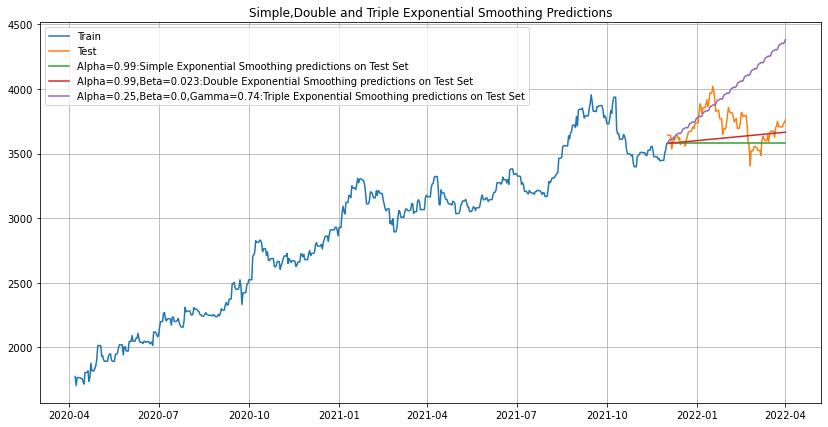

In [44]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.023:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Auto-correlation plot

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

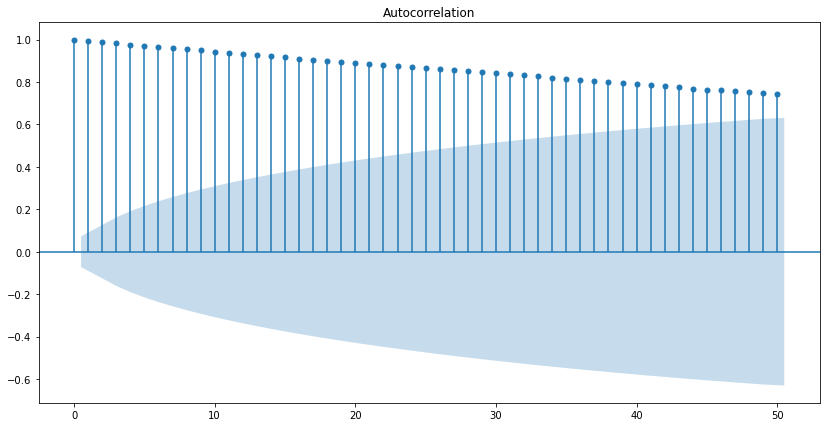

In [46]:
plot_acf(data,lags=50,ax=plt.gca());

## Auto Regression - AR Model

In [47]:
from statsmodels.tsa.arima_model import ARMA

In [48]:
# lag 1
ARMA(data,order=[1,0]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                  725
Model:                     ARMA(1, 0)   Log Likelihood               -3656.951
Method:                       css-mle   S.D. of innovations             37.367
Date:                Wed, 06 Apr 2022   AIC                           7319.902
Time:                        23:00:57   BIC                           7333.661
Sample:                    04-07-2020   HQIC                          7325.212
                         - 04-01-2022                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2837.2910    752.906      3.768      0.000    1361.623    4312.959
ar.L1.close     0.9991      0.001    886.452      0.000       0.997       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

In [49]:
# lag 2
ARMA(data,order=[2,0]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                  725
Model:                     ARMA(2, 0)   Log Likelihood               -3656.925
Method:                       css-mle   S.D. of innovations             37.366
Date:                Wed, 06 Apr 2022   AIC                           7321.849
Time:                        23:00:57   BIC                           7340.194
Sample:                    04-07-2020   HQIC                          7328.929
                         - 04-01-2022                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2811.5027    754.497      3.726      0.000    1332.716    4290.289
ar.L1.close     1.0077      0.036     27.961      0.000       0.937       1.078
ar.L2.close    -0.0086      0.036     -0.239      0.811      -0.079       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2          116.0620           +0.0000j          116.0620            0.0000
-----------------------------------------------------------------------------
"""

In [50]:
# lag 3
ARMA(data,order=[3,0]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                  725
Model:                     ARMA(3, 0)   Log Likelihood               -3656.763
Method:                       css-mle   S.D. of innovations             37.357
Date:                Wed, 06 Apr 2022   AIC                           7323.526
Time:                        23:00:57   BIC                           7346.457
Sample:                    04-07-2020   HQIC                          7332.376
                         - 04-01-2022                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2820.3253    759.970      3.711      0.000    1330.812    4309.839
ar.L1.close     1.0079      0.036     28.078      0.000       0.938       1.078
ar.L2.close    -0.0300      0.052     -0.577      0.564      -0.132       0.072
ar.L3.close     0.0212      0.037      0.568      0.570      -0.052       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           -0.0000j            1.0009           -0.0000
AR.2            0.2082           -6.8632j            6.8663           -0.2452
AR.3            0.2082           +6.8632j            6.8663            0.2452
-----------------------------------------------------------------------------
"""

The AIC values are increasing as we are increasing the lags in ARMA model

### Partial-Auto Correlation function plot

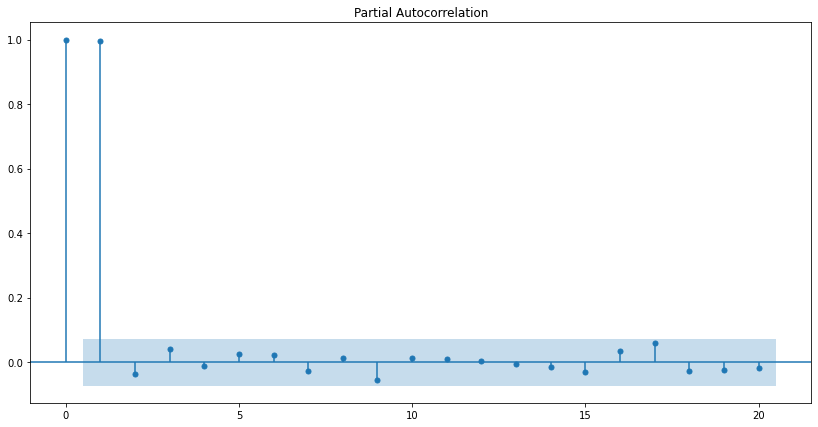

In [51]:
plot_pacf(data,lags=20,ax=plt.gca());

## ARIMA model

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
# Moving avg - 1
ARIMA(data, order=[0,0,1]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  725
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -5207.364
Date:                Wed, 06 Apr 2022   AIC                          10420.728
Time:                        23:00:57   BIC                          10434.487
Sample:                    04-07-2020   HQIC                         10426.038
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3019.5700     25.388    118.937      0.000    2969.810    3069.330
ma.L1          0.9599      0.011     88.651      0.000       0.939       0.981
sigma2      1.011e+05   7582.870     13.331      0.000    8.62e+04    1.16e+05
===================================================================================
Ljung-Box (L1) (Q):                 604.17   Jarque-Bera (JB):                37.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.38
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
# Moving avg - 2
ARIMA(data, order=[0,0,2]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  725
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -4821.643
Date:                Wed, 06 Apr 2022   AIC                           9651.286
Time:                        23:00:58   BIC                           9669.631
Sample:                    04-07-2020   HQIC                          9658.366
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3019.5572     26.209    115.210      0.000    2968.188    3070.926
ma.L1          1.6658      0.019     86.400      0.000       1.628       1.704
ma.L2          0.8785      0.019     45.538      0.000       0.841       0.916
sigma2      3.479e+04   2286.231     15.216      0.000    3.03e+04    3.93e+04
===================================================================================
Ljung-Box (L1) (Q):                 374.30   Jarque-Bera (JB):                19.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.29
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
# Moving avg - 3
ARIMA(data, order=[0,0,3]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  725
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -4581.315
Date:                Wed, 06 Apr 2022   AIC                           9172.629
Time:                        23:00:58   BIC                           9195.560
Sample:                    04-07-2020   HQIC                          9181.479
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3019.5696     27.484    109.866      0.000    2965.702    3073.437
ma.L1          1.8713      0.028     67.926      0.000       1.817       1.925
ma.L2          1.7272      0.042     41.198      0.000       1.645       1.809
ma.L3          0.7499      0.027     27.329      0.000       0.696       0.804
sigma2      1.792e+04   1054.640     16.989      0.000    1.59e+04       2e+04
===================================================================================
Ljung-Box (L1) (Q):                 202.19   Jarque-Bera (JB):                 7.51
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.77   Skew:                            -0.20
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In ARIMA model, the AIC values are reducing as we are increasing the moving average.

## Stationary test - Augmented Dicky (AD) fuller

In [56]:
 from statsmodels.tsa.stattools import adfuller

H0: Data is not stationary

H1: Data is stationary

In [57]:
stationary_test = adfuller(data, autolag="AIC")
print("F-statistical:",stationary_test[0])
print("p-value:",stationary_test[1])
print("No. of lags:",stationary_test[2])
print("No. of observations:",stationary_test[3])
print("F-critical at different significant levels:",stationary_test[4])
print("AIC:",stationary_test[5])

F-statistical: -1.6456892331317032
p-value: 0.45928957567625106
No. of lags: 0
No. of observations: 724
F-critical at different significant levels: {'1%': -3.4394144152232995, '5%': -2.8655403100177566, '10%': -2.5689002207655443}
AIC: 7083.847353058782


Since p-value > alpha (0.05) --> We accept H0 and hence, data is not stationary.

### Checking the parameters which give the optimum AIC value

#### 1) Auto-ARIMA method

In [58]:
from pmdarima import auto_arima

In [59]:
auto_arima(data).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  725
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3646.905
Date:                Wed, 06 Apr 2022   AIC                           7297.810
Time:                        23:01:00   BIC                           7306.979
Sample:                             0   HQIC                          7301.349
                                - 725                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7397      1.393      1.966      0.049       0.009       5.470
sigma2      1389.1481     38.032     36.526      0.000    1314.608    1463.689
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               908.65
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

According to this method, the best values for p,d,q are (0,1,0) with both Intercept and sigma2 being significant(p-value < 0.05).

#### 2) without using auto_arima

In [60]:
import itertools

In [61]:
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(0, 0, 3, 7)
Model: (0, 0, 2)(0, 1, 0, 7)


In [62]:
arima_AIC= pd.DataFrame(columns=['param', 'AIC'])
arima_AIC

,param,AIC


In [63]:
for param in pdq:
    arima_mod = ARIMA(data, order=param).fit()
    print("ARIMA{} - AIC: {}".format(param,arima_mod.aic))
    arima_AIC = arima_AIC.append({'param':param, 'AIC':arima_mod.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC: 11359.10183444131
ARIMA(0, 0, 1) - AIC: 10420.728110314827
ARIMA(0, 0, 2) - AIC: 9651.286419789216
ARIMA(0, 0, 3) - AIC: 9172.629021393232
ARIMA(0, 1, 0) - AIC: 7299.711358971139
ARIMA(0, 1, 1) - AIC: 7301.666639194744
ARIMA(0, 1, 2) - AIC: 7303.263364661523
ARIMA(0, 1, 3) - AIC: 7304.583326038119
ARIMA(1, 0, 0) - AIC: 7319.965617459683
ARIMA(1, 0, 1) - AIC: 7321.908468099689
ARIMA(1, 0, 2) - AIC: 7323.520713131625
ARIMA(1, 0, 3) - AIC: 7324.806194244169
ARIMA(1, 1, 0) - AIC: 7301.668596615312
ARIMA(1, 1, 1) - AIC: 7303.249746224741
ARIMA(1, 1, 2) - AIC: 7305.4018515066555
ARIMA(1, 1, 3) - AIC: 7306.237266918621
ARIMA(2, 0, 0) - AIC: 7321.910877005528
ARIMA(2, 0, 1) - AIC: 7323.955746188896
ARIMA(2, 0, 2) - AIC: 7325.872173550127
ARIMA(2, 0, 3) - AIC: 7326.462467220148
ARIMA(2, 1, 0) - AIC: 7303.330016537468
ARIMA(2, 1, 1) - AIC: 7304.7017372569135
ARIMA(2, 1, 2) - AIC: 7304.867804083252
ARIMA(2, 1, 3) - AIC: 7304.500603213997
ARIMA(3, 0, 0) - AIC: 7323.5884097966

In [64]:
arima_AIC.sort_values(by='AIC', ascending=True)

,param,AIC
4,"(0, 1, 0)",7299.711359
5,"(0, 1, 1)",7301.666639
12,"(1, 1, 0)",7301.668597
13,"(1, 1, 1)",7303.249746
6,"(0, 1, 2)",7303.263365
20,"(2, 1, 0)",7303.330017
28,"(3, 1, 0)",7304.471694
23,"(2, 1, 3)",7304.500603
7,"(0, 1, 3)",7304.583326
21,"(2, 1, 1)",7304.701737


According to second method too, the best parameters are (0,1,0).

In [65]:
auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, start_P=0, seasonal=True,
            d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7301.815, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7297.810, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7299.807, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7299.810, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7299.711, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.227 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

## Predicting the close price for the next 15 days

In [66]:
model = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, start_P=0, seasonal=True,
            d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6036.969, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6033.515, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6035.495, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6035.492, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6035.682, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.422 seconds


In [67]:
model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [68]:
model.predict(15)

array([3580.7893864 , 3583.7787728 , 3586.7681592 , 3589.75754561,
       3592.74693201, 3595.73631841, 3598.72570481, 3601.71509121,
       3604.70447761, 3607.69386401, 3610.68325041, 3613.67263682,
       3616.66202322, 3619.65140962, 3622.64079602])

In [69]:
import datetime

In [70]:
dates = []
pred_close_price = []
for i in range(1,16): # 15 days
    dates.append(data.index[-1] + datetime.timedelta(days=i))
    pred_close_price.append(model.predict(len(test)+i)[-1])

In [71]:
dates

[Timestamp('2022-04-02 00:00:00', freq='D'),
 Timestamp('2022-04-03 00:00:00', freq='D'),
 Timestamp('2022-04-04 00:00:00', freq='D'),
 Timestamp('2022-04-05 00:00:00', freq='D'),
 Timestamp('2022-04-06 00:00:00', freq='D'),
 Timestamp('2022-04-07 00:00:00', freq='D'),
 Timestamp('2022-04-08 00:00:00', freq='D'),
 Timestamp('2022-04-09 00:00:00', freq='D'),
 Timestamp('2022-04-10 00:00:00', freq='D'),
 Timestamp('2022-04-11 00:00:00', freq='D'),
 Timestamp('2022-04-12 00:00:00', freq='D'),
 Timestamp('2022-04-13 00:00:00', freq='D'),
 Timestamp('2022-04-14 00:00:00', freq='D'),
 Timestamp('2022-04-15 00:00:00', freq='D'),
 Timestamp('2022-04-16 00:00:00', freq='D')]

### Next 15 days predicted close price values

In [72]:
pred_model = pd.DataFrame(pred_close_price, index=dates, columns=["Predicted Close Price"])
pred_model

,Predicted Close Price
2022-04-02,3942.505141
2022-04-03,3945.494527
2022-04-04,3948.483914
2022-04-05,3951.473300
2022-04-06,3954.462687
2022-04-07,3957.452073
2022-04-08,3960.441459
2022-04-09,3963.430846
2022-04-10,3966.420232
2022-04-11,3969.409619


In [73]:
final_df = pd.concat([data,pred_model])
final_df.tail(20)

,close,Predicted Close Price
2022-03-28,3707.70,NaN
2022-03-29,3705.35,NaN
2022-03-30,3731.55,NaN
2022-03-31,3739.95,NaN
2022-04-01,3758.75,NaN
2022-04-02,NaN,3942.505141
2022-04-03,NaN,3945.494527
2022-04-04,NaN,3948.483914
2022-04-05,NaN,3951.473300
2022-04-06,NaN,3954.462687


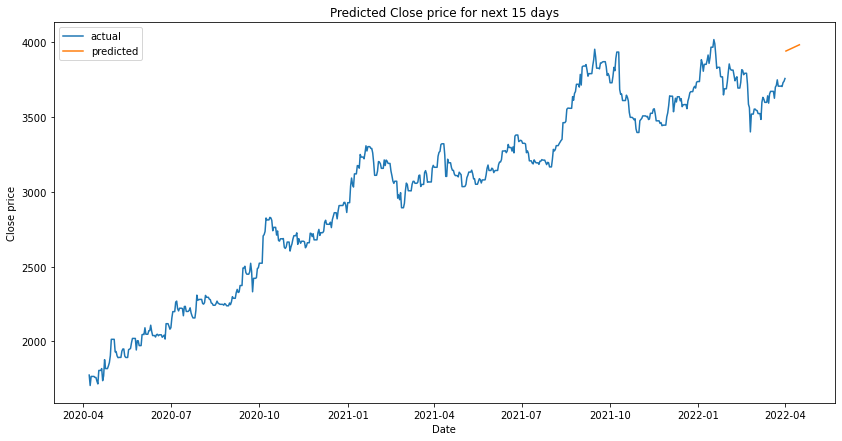

In [74]:
plt.plot(final_df)
plt.title("Predicted Close price for next 15 days")
plt.legend(labels=["actual","predicted"])
plt.xlabel("Date")
plt.ylabel("Close price")
plt.show()